In [58]:
import pandas as pd

In [59]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [60]:
import chardet

# Detecting the encoding
with open("C:\\Users\\HP\\Desktop\\Fx Project\\Dataset\\ML-MATT-CompetitionQT1920_train.csv", 'rb') as f:
    result = chardet.detect(f.read())

print(result['encoding'])


ISO-8859-1


In [61]:

# Read the file using the detected encoding
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Fx Project\\Dataset\\ML-MATT-CompetitionQT1920_train.csv", encoding=result['encoding'])

# Display the first few rows of the dataframe
print(df.head())

    Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1   9:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2   7:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3   2:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4   3:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0  


In [62]:
# Specify the file paths
input_file = "C:\\Users\\HP\\Desktop\\Fx Project\\Dataset\\ML-MATT-CompetitionQT1920_train.csv"
output_file = "C:\\Users\\HP\\Desktop\\Fx Project\\Dataset\\ML-MATT-CompetitionQT1920_train_utf8.csv"

# Read the file with ISO-8859-1 encoding and write with UTF-8 encoding
with open(input_file, 'r', encoding='iso-8859-1') as f_in:
    with open(output_file, 'w', encoding='utf-8') as f_out:
        for line in f_in:
            f_out.write(line)

print("File converted from ISO-8859-1 to UTF-8.")

File converted from ISO-8859-1 to UTF-8.


In [63]:
import pandas as pd

# Load the converted file
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Fx Project\\Dataset\\ML-MATT-CompetitionQT1920_train_utf8.csv", encoding='utf-8')

# Display the first few rows of the dataframe
print(df.head())

    Time CellName  PRBUsageUL  PRBUsageDL  meanThr_DL  meanThr_UL  maxThr_DL  \
0  10:45    3BLTE      11.642       1.393       0.370       0.041     15.655   
1   9:45    1BLTE      21.791       1.891       0.537       0.268     10.273   
2   7:45    9BLTE       0.498       0.398       0.015       0.010      0.262   
3   2:45    4ALTE       1.891       1.095       0.940       0.024     60.715   
4   3:30   10BLTE       0.303       0.404       0.016       0.013      0.348   

   maxThr_UL  meanUE_DL  meanUE_UL  maxUE_DL  maxUE_UL maxUE_UL+DL  Unusual  
0      0.644      1.114      1.025       4.0       3.0           7        1  
1      1.154      1.353      1.085       6.0       4.0          10        1  
2      0.164      0.995      0.995       1.0       1.0           2        1  
3      0.825      1.035      0.995       2.0       2.0           4        1  
4      0.168      1.011      1.011       2.0       1.0           3        0  


In [64]:
df.columns

Index(['Time', 'CellName', 'PRBUsageUL', 'PRBUsageDL', 'meanThr_DL',
       'meanThr_UL', 'maxThr_DL', 'maxThr_UL', 'meanUE_DL', 'meanUE_UL',
       'maxUE_DL', 'maxUE_UL', 'maxUE_UL+DL', 'Unusual'],
      dtype='object')

In [65]:
df.shape

(36904, 14)

In [66]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [67]:
newdf.head(5)


,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
0,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,1
1,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,1
2,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,1
3,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,1
4,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,0


In [68]:
newdf.shape

(36904, 11)

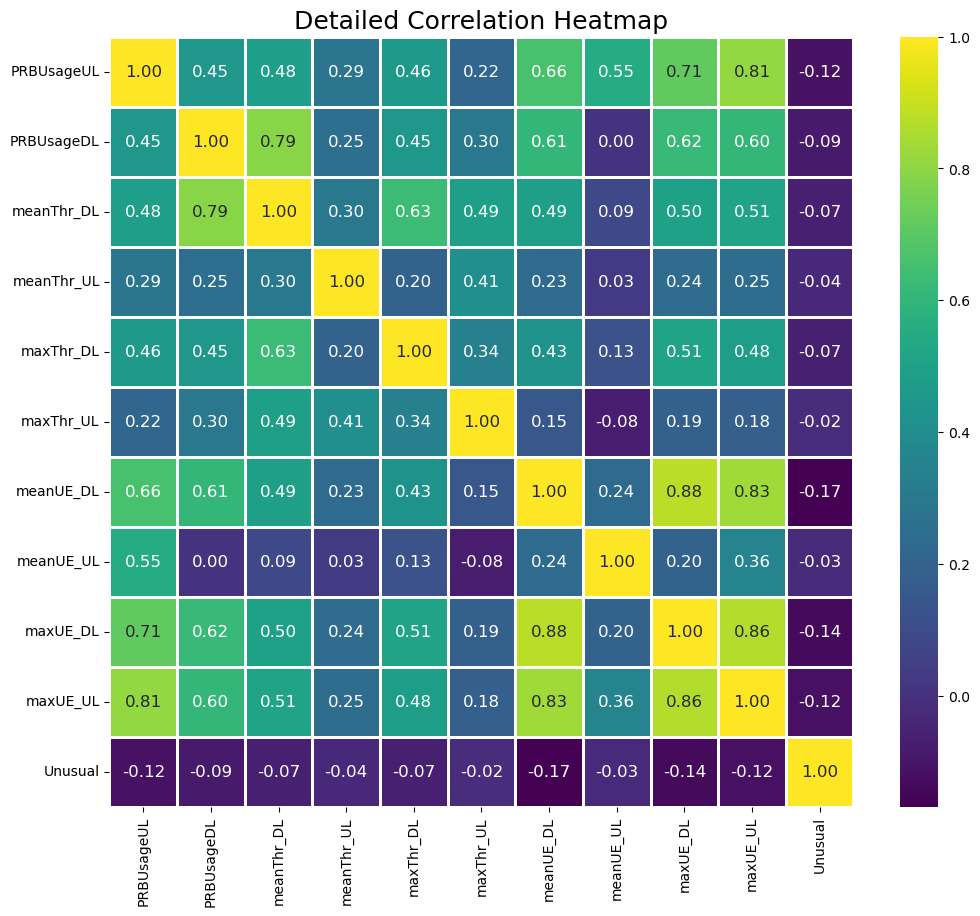

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr = newdf.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='viridis', 
            linewidths=1, 
            annot_kws={"size": 12})
plt.title('Detailed Correlation Heatmap', fontsize=18)
plt.show()

In [70]:
# Check for NaN values in numerical columns
nan_check = newdf.isnull().any()

# Print the result
print("Columns containing NaN values:")
print(nan_check[nan_check == True])


Columns containing NaN values:
maxUE_DL    True
maxUE_UL    True
dtype: bool


In [71]:
newdf['maxUE_DL'].head(20)

0     4.0
1     6.0
2     1.0
3     2.0
4     2.0
5     6.0
6     3.0
7     3.0
8     6.0
9     2.0
10    2.0
11    5.0
12    3.0
13    4.0
14    6.0
15    3.0
16    4.0
17    4.0
18    7.0
19    6.0
Name: maxUE_DL, dtype: float64

In [72]:
a = df['maxUE_DL'].unique()
print(a)

[ 4.  6.  1.  2.  3.  5.  7. nan  9.  0.  8. 10. 11. 12.]


In [73]:
# Find rows with NaN values in any numerical column
rows_with_nan = newdf[newdf.isnull().any(axis=1)]

rows_with_nan

,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,Unusual
51,13.743,4.042,2.113,0.100,44.483,1.110,0.0,0.0,NaN,NaN,0
1290,22.837,2.324,0.500,0.090,24.374,0.847,0.0,0.0,NaN,NaN,0
2082,0.199,1.791,0.693,0.032,15.634,0.353,0.0,0.0,NaN,NaN,1
2842,9.903,1.516,0.466,0.032,24.576,0.931,0.0,0.0,NaN,NaN,0
3384,0.404,0.909,0.216,0.042,9.730,2.714,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
36036,1.516,0.505,0.078,0.013,1.298,0.267,0.0,0.0,NaN,NaN,0
36046,15.360,2.829,1.149,0.071,39.615,0.947,0.0,0.0,NaN,NaN,0
36317,30.921,4.042,1.450,0.175,26.369,1.487,0.0,0.0,NaN,NaN,0
36652,0.606,1.819,0.255,0.027,14.546,0.820,0.0,0.0,NaN,NaN,0


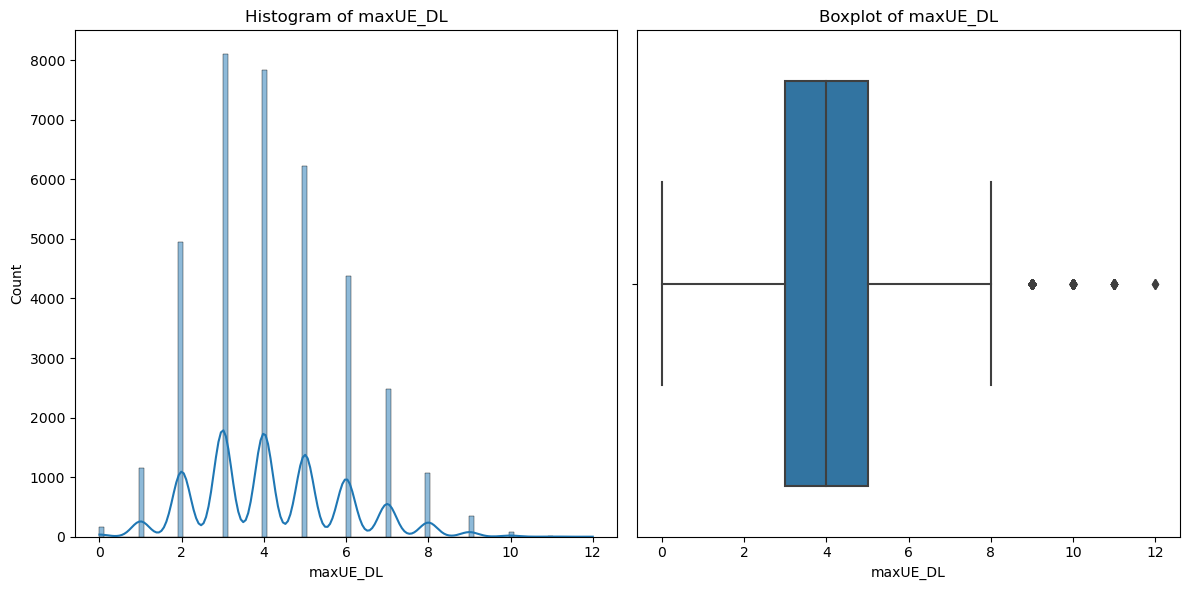

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the column to visualize
column_to_visualize = 'maxUE_DL'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df[column_to_visualize].dropna(), kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {column_to_visualize}')

# Boxplot
sns.boxplot(x=df[column_to_visualize].dropna(), ax=axes[1])
axes[1].set_title(f'Boxplot of {column_to_visualize}')

# Show the plots
plt.tight_layout()
plt.show()

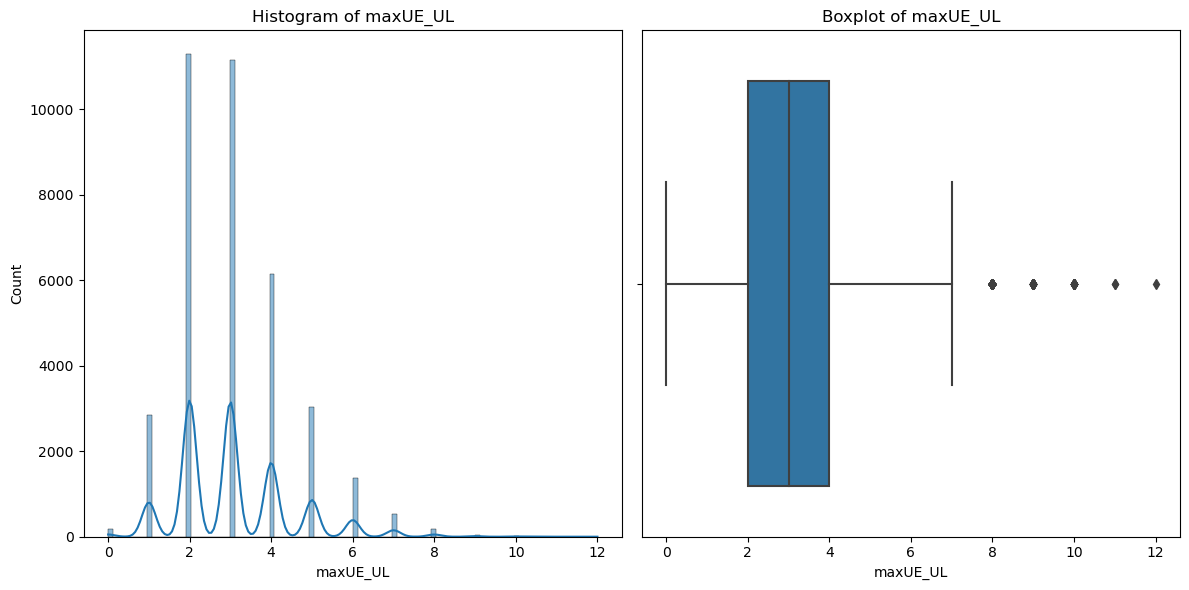

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the column to visualize
column_to_visualize = 'maxUE_UL'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df[column_to_visualize].dropna(), kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {column_to_visualize}')

# Boxplot
sns.boxplot(x=df[column_to_visualize].dropna(), ax=axes[1])
axes[1].set_title(f'Boxplot of {column_to_visualize}')

# Show the plots
plt.tight_layout()
plt.show()

In [76]:
df['maxUE_UL'] = df['maxUE_UL'].fillna(df['maxUE_UL'].mode()[0])

In [77]:
df['maxUE_DL'] = df['maxUE_DL'].fillna(df['maxUE_DL'].mean())

In [78]:
# Check for NaN values in numerical columns
nan_check1 = df.isnull().any()

# Print the result
print("Columns containing NaN values:")
print(nan_check1[nan_check1 == True])

Columns containing NaN values:
maxUE_UL+DL    True
dtype: bool


In [79]:
df['maxUE_UL+DL'].unique()

array(['7', '10', '2', '4', '3', '11', '6', '8', '5', '9', '12',
       '#¡VALOR!', '14', '17', '0', '13', '15', '16', '18', '19', '1',
       '20', '23', nan, '21'], dtype=object)

In [80]:
import numpy as np
df['maxUE_UL+DL'] = df['maxUE_UL+DL'].replace('#¡VALOR!', np.nan)

In [81]:
df['maxUE_UL+DL'] = pd.to_numeric(df['maxUE_UL+DL'], errors='coerce')

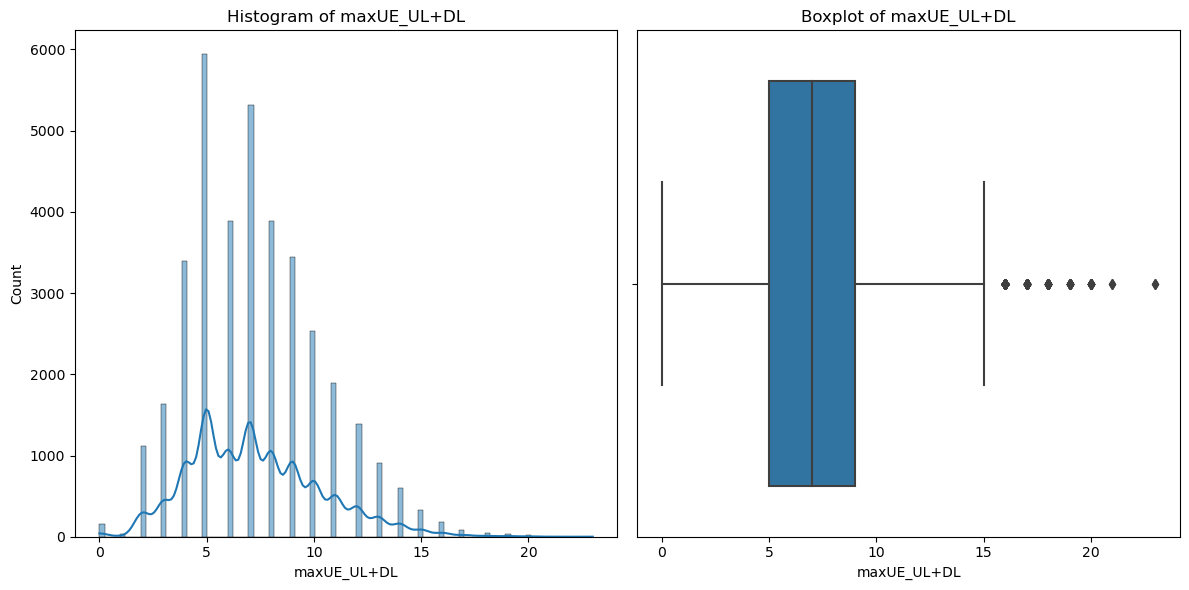

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the column to visualize
column_to_visualize = 'maxUE_UL+DL'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(df[column_to_visualize].dropna(), kde=True, ax=axes[0])
axes[0].set_title(f'Histogram of {column_to_visualize}')

# Boxplot
sns.boxplot(x=df[column_to_visualize].dropna(), ax=axes[1])
axes[1].set_title(f'Boxplot of {column_to_visualize}')

# Show the plots
plt.tight_layout()
plt.show()

In [83]:
df['maxUE_UL+DL'].unique()

array([ 7., 10.,  2.,  4.,  3., 11.,  6.,  8.,  5.,  9., 12., nan, 14.,
       17.,  0., 13., 15., 16., 18., 19.,  1., 20., 23., 21.])

In [84]:
df['maxUE_UL+DL'] = df['maxUE_UL+DL'].fillna(df['maxUE_UL+DL'].median())

In [85]:
# Check for NaN values in numerical columns
nan_check2 = df.isnull().any()

# Print the result
print("Columns containing NaN values:")
print(nan_check2[nan_check2 == True])

Columns containing NaN values:
Series([], dtype: bool)


In [86]:
df.head(10)

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,3BLTE,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
1,9:45,1BLTE,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10.0,1
2,7:45,9BLTE,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2:45,4ALTE,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3:30,10BLTE,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0
5,13:30,9ALTE,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11.0,0
6,20:00,9BLTE,7.074,0.505,0.032,0.012,1.680,0.131,1.041,1.041,3.0,3.0,6.0,0
7,8:00,4BLTE,7.960,1.393,0.299,0.025,24.697,0.451,1.075,1.015,3.0,3.0,6.0,1
8,16:45,4CLTE,26.879,3.032,0.525,0.120,9.145,0.894,1.425,1.273,6.0,5.0,11.0,0
9,4:15,6CLTE,4.143,0.505,0.021,0.013,0.409,0.437,1.021,0.010,2.0,2.0,4.0,0


In [87]:
df['CellName'].unique()

array(['3BLTE', '1BLTE', '9BLTE', '4ALTE', '10BLTE', '9ALTE', '4BLTE',
       '4CLTE', '6CLTE', '5CLTE', '7BLTE', '8CLTE', '7ULTE', '6WLTE',
       '7VLTE', '7WLTE', '5ALTE', '6ALTE', '6ULTE', '3CLTE', '5BLTE',
       '8ALTE', '8BLTE', '6BLTE', '10CLTE', '7CLTE', '3ALTE', '1CLTE',
       '2ALTE', '10ALTE', '1ALTE', '6VLTE', '7ALTE'], dtype=object)

In [88]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'CellName' column
df['CellName'] = label_encoder.fit_transform(df['CellName'])


In [89]:
df.head()

,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,10:45,8,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
1,9:45,4,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10.0,1
2,7:45,32,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,2:45,10,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,3:30,1,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0


In [90]:
b = df['CellName'].unique()

In [92]:
b.sort()
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


In [94]:
c = df['Time'].unique()

In [96]:
len(c)

96

In [97]:
df.shape

(36904, 14)

In [98]:
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Convert 'Time' column to minutes
df['Time'] = df['Time'].apply(time_to_minutes)

df.head(20)


,Time,CellName,PRBUsageUL,PRBUsageDL,meanThr_DL,meanThr_UL,maxThr_DL,maxThr_UL,meanUE_DL,meanUE_UL,maxUE_DL,maxUE_UL,maxUE_UL+DL,Unusual
0,645,8,11.642,1.393,0.370,0.041,15.655,0.644,1.114,1.025,4.0,3.0,7.0,1
1,585,4,21.791,1.891,0.537,0.268,10.273,1.154,1.353,1.085,6.0,4.0,10.0,1
2,465,32,0.498,0.398,0.015,0.010,0.262,0.164,0.995,0.995,1.0,1.0,2.0,1
3,165,10,1.891,1.095,0.940,0.024,60.715,0.825,1.035,0.995,2.0,2.0,4.0,1
4,210,1,0.303,0.404,0.016,0.013,0.348,0.168,1.011,1.011,2.0,1.0,3.0,0
5,810,31,15.966,1.819,0.415,0.071,10.116,0.706,1.364,1.314,6.0,5.0,11.0,0
6,1200,32,7.074,0.505,0.032,0.012,1.680,0.131,1.041,1.041,3.0,3.0,6.0,0
7,480,11,7.960,1.393,0.299,0.025,24.697,0.451,1.075,1.015,3.0,3.0,6.0,1
8,1005,12,26.879,3.032,0.525,0.120,9.145,0.894,1.425,1.273,6.0,5.0,11.0,0
9,255,18,4.143,0.505,0.021,0.013,0.409,0.437,1.021,0.010,2.0,2.0,4.0,0


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

# Splitting the data into features and target variable
X = df.drop(columns=['Unusual'])  # Features
y = df['Unusual']  # Target variable


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Concatenate the target variable 'Unusual' back to the normalized DataFrame
df_normalized['Unusual'] = y



# Separate features (X) and target variable (y)
y = df_normalized['Unusual']
X = df_normalized.drop(columns=['Unusual'])

# Perform train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (25832, 13), y_train shape: (25832,)
X_test shape: (11072, 13), y_test shape: (11072,)


In [106]:


# Initializing the Naive Bayes classifier (assuming Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Training the Naive Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.44      0.57      8013
           1       0.32      0.70      0.44      3059

    accuracy                           0.51     11072
   macro avg       0.56      0.57      0.50     11072
weighted avg       0.66      0.51      0.53     11072

Confusion Matrix:
[[3535 4478]
 [ 926 2133]]


In [107]:
from sklearn.linear_model import LogisticRegression


# Initializing the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Training the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.99      0.84      8013
           1       0.20      0.01      0.01      3059

    accuracy                           0.72     11072
   macro avg       0.46      0.50      0.42     11072
weighted avg       0.58      0.72      0.61     11072

Confusion Matrix:
[[7949   64]
 [3043   16]]


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.75
Confusion Matrix:
[[7245  768]
 [1975 1084]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      8013
           1       0.59      0.35      0.44      3059

    accuracy                           0.75     11072
   macro avg       0.69      0.63      0.64     11072
weighted avg       0.73      0.75      0.73     11072



In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Initialize Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42) 
# Train the model
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Save the trained model to a file
model_filename = 'decision_tree_model.joblib'
joblib.dump(dt, model_filename)
print(f"Model saved to {model_filename}")


Accuracy: 0.95
Confusion Matrix:
[[7728  285]
 [ 311 2748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8013
           1       0.91      0.90      0.90      3059

    accuracy                           0.95     11072
   macro avg       0.93      0.93      0.93     11072
weighted avg       0.95      0.95      0.95     11072

Model saved to decision_tree_model.joblib


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.92
Confusion Matrix:
[[7955   58]
 [ 878 2181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8013
           1       0.97      0.71      0.82      3059

    accuracy                           0.92     11072
   macro avg       0.94      0.85      0.88     11072
weighted avg       0.92      0.92      0.91     11072



In [111]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize MLPClassifier (Artificial Neural Network) classifier
ann = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)  

# Train the model
ann.fit(X_train, y_train)

# Predict on the test data
y_pred = ann.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.83
Confusion Matrix:
[[7526  487]
 [1414 1645]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8013
           1       0.77      0.54      0.63      3059

    accuracy                           0.83     11072
   macro avg       0.81      0.74      0.76     11072
weighted avg       0.82      0.83      0.82     11072



In [114]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
# Models to evaluate
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Print results
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

Gradient Boosting: 0.9062
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8013
           1       1.00      0.66      0.80      3059

    accuracy                           0.91     11072
   macro avg       0.94      0.83      0.87     11072
weighted avg       0.92      0.91      0.90     11072

SVM: 0.7238
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      8013
           1       1.00      0.00      0.00      3059

    accuracy                           0.72     11072
   macro avg       0.86      0.50      0.42     11072
weighted avg       0.80      0.72      0.61     11072

Best Model: Gradient Boosting with accuracy 0.9062
